### Importing API and libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
# import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow import keras
print("Keras in standby...")

Keras in standby...


### Reading data:

In [2]:
glassDatabase = pd.read_csv("Databases/Glass/glass.data",delim_whitespace=False, header=None, index_col= 0)
# print(glassDatabase)
attrNames = ["RI",
            "NA2O",
            "MGO",
            "AL2O3",
            "SIO2",
            "K2O",
            "CAO",
            "BAO",
            "FE2O3",
            "Class",
            ]
glassDatabase.columns = attrNames
print((glassDatabase))
# labels = glassDatabase.iloc[:,-1]
labels = glassDatabase["Class"]

# labels_NORMAL = labels.min()/(labels.max() - labels.min())
glassDatabase_Attributes = glassDatabase.iloc[:,0:-1]
y2= keras.utils.to_categorical(labels)
y2 = pd.DataFrame(data = y2)
y2 = y2.iloc[:,1:]
# xTrain, xTest, yTrain, yTest = train_test_split(glassDatabase_Attributes, labels, test_size=0.7, train_size=0.3, shuffle=True)
xTrain, xTest, yTrain, yTest = train_test_split(glassDatabase_Attributes, y2, test_size=0.7, train_size=0.3, shuffle=True)

# print(labels)


          RI   NA2O   MGO  AL2O3   SIO2   K2O   CAO   BAO  FE2O3  Class
0                                                                      
1    1.52101  13.64  4.49   1.10  71.78  0.06  8.75  0.00    0.0      1
2    1.51761  13.89  3.60   1.36  72.73  0.48  7.83  0.00    0.0      1
3    1.51618  13.53  3.55   1.54  72.99  0.39  7.78  0.00    0.0      1
4    1.51766  13.21  3.69   1.29  72.61  0.57  8.22  0.00    0.0      1
5    1.51742  13.27  3.62   1.24  73.08  0.55  8.07  0.00    0.0      1
..       ...    ...   ...    ...    ...   ...   ...   ...    ...    ...
210  1.51623  14.14  0.00   2.88  72.61  0.08  9.18  1.06    0.0      7
211  1.51685  14.92  0.00   1.99  73.06  0.00  8.40  1.59    0.0      7
212  1.52065  14.36  0.00   2.02  73.42  0.00  8.44  1.64    0.0      7
213  1.51651  14.38  0.00   1.94  73.61  0.00  8.48  1.57    0.0      7
214  1.51711  14.23  0.00   2.08  73.36  0.00  8.62  1.67    0.0      7

[214 rows x 10 columns]


### Normalization

In [3]:
# for i in range(0, glassDatabase.shape[1]-1):
    # glassDatabase.iloc[:,i] = (glassDatabase.iloc[:,i] - glassDatabase.iloc[:,i].min())/ (glassDatabase.iloc[:,i].max() - glassDatabase.iloc[:,i].min())

scaler= preprocessing.StandardScaler().fit(xTrain)
xTrain_std = scaler.transform(xTrain)
xTest_std = scaler.transform(xTest)

### Creating a model

In [14]:
model = keras.Sequential()
# model.add(keras.layers.Dense(10, activation="sigmoid", input_dim = glassDatabase.shape[1]-1))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(7, activation="relu"))
model.add(keras.layers.Dense(5, activation="relu"))
model.add(keras.layers.Dense(3, activation="relu"))
# model.add(keras.layers.Dense(7, activation="relu"))
model.add(keras.layers.Dense(7, activation="softmax"))
# model.add(keras.layers.Dense(1, activation="softmax"))
# model.add(keras.layers.Dense(1, activation='linear'))
opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
es = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])
np.random.seed(1)


### Training the network

In [15]:
# history = model.fit(x = xTrain_std , y = yTrain , epochs= 100,batch_size=10, validation_split=0.2, callbacks=[es])
history = model.fit(x = xTrain_std , y = yTrain , epochs= 100,batch_size=10, validation_split=0.2, callbacks=[es])
# print(glassDatabase.iloc[:,:-1])
outputs = model.predict(xTest_std)
model.summary()


Epoch 1/100
6/6 [==============================] - 0s 28ms/step - loss: 2.0123 - accuracy: 0.0588 - val_loss: 2.0327 - val_accuracy: 0.0769
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 1.9953 - accuracy: 0.1569 - val_loss: 2.0161 - val_accuracy: 0.2308
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 1.9806 - accuracy: 0.2353 - val_loss: 1.9999 - val_accuracy: 0.3077
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 1.9675 - accuracy: 0.2745 - val_loss: 1.9859 - val_accuracy: 0.3846
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 1.9568 - accuracy: 0.2941 - val_loss: 1.9711 - val_accuracy: 0.3846
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 1.9463 - accuracy: 0.3137 - val_loss: 1.9595 - val_accuracy: 0.3846
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 1.9381 - accuracy: 0.3137 - val_loss: 1.9489 - val_accuracy: 0.3846
Epoch 8/100
6/6 [=========

In [16]:
classes_pred = model.predict(xTest_std)
print(classes_pred[50:100,:])
print(yTest[50:100])

[[3.08236182e-01 1.93406090e-01 1.74763680e-01 9.80104227e-03
  4.34624217e-02 3.43479477e-02 2.35982671e-01]
 [3.27422678e-01 1.78905264e-01 1.69426084e-01 5.65665495e-03
  3.30580808e-02 2.61437632e-02 2.59387553e-01]
 [3.27810228e-01 1.78579599e-01 1.69290140e-01 5.58879087e-03
  3.28579061e-02 2.59858556e-02 2.59887487e-01]
 [4.02470291e-01 3.68796028e-02 6.39993250e-02 2.64329560e-06
  5.44913113e-04 4.34847811e-04 4.95668352e-01]
 [3.96879613e-01 2.79548094e-02 5.30395880e-02 8.16902684e-07
  2.84676440e-04 2.27477853e-04 5.21613061e-01]
 [3.76052022e-01 1.25512570e-01 1.40493855e-01 7.38853705e-04
  1.15470579e-02 9.15469322e-03 3.36500943e-01]
 [3.07756007e-01 1.93729535e-01 1.74864277e-01 9.92617756e-03
  4.37345207e-02 3.45624089e-02 2.35427082e-01]
 [3.08770031e-01 1.93044215e-01 1.74649999e-01 9.66322701e-03
  4.31605130e-02 3.41099650e-02 2.36601979e-01]
 [3.79973352e-01 1.19708918e-01 1.36646613e-01 5.78781823e-04
  1.01495683e-02 8.04908853e-03 3.44893694e-01]
 [3.646501

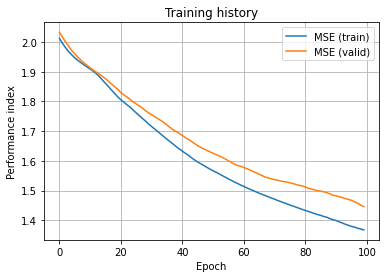

ValueError: x and y must have same first dimension, but have shapes (214, 7) and (150, 7)

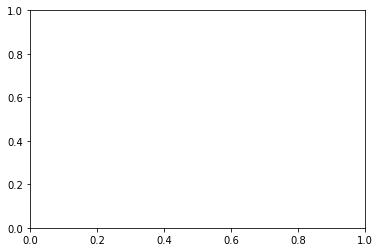

In [17]:
outputs = pd.DataFrame(data=outputs)

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training history')
plt.ylabel('Performance index')
plt.xlabel('Epoch')
plt.legend(['MSE (train)', 'MSE (valid)'], loc='upper right')
plt.grid()
plt.show()

# Plot target-output relationship (ideal: targets == outputs, straight line)
plt.plot(y2,outputs,'ok')
plt.title('Output scatter plot')
plt.xlabel('targets')
plt.ylabel('outputs')
plt.grid()
plt.show()